In [37]:
import os

models_paths = [os.environ["DATA"] + "/03_paper_popalg/01_QED_opt/v2/02.01_pop_1_QED_opt_from_methane/",
                os.environ["DATA"] + "/03_paper_popalg/02_J_opt/v2/02.02_pop_1_J_opt_from_methane/",
                os.environ["DATA"] + "/03_paper_popalg/02_J_opt/v2/02.12_pop_1_normed_J_opt_from_methane/",
                os.environ["DATA"] + "/03_paper_popalg/03_CLScore_opt/v2/02.03_pop_1_CLScore_opt_from_methane/",
                os.environ["DATA"] + "/03_paper_popalg/04_SAScore_opt/v2/02.04_pop_1_SAScore_opt_from_methane/"]
                
names = ["QED", "PlogP", "norm. PlogP", "CLScore", "SAScore"]

size = (300, 200)

In [46]:
import csv
from os.path import join
import pandas as pd
import numpy as np
from rdkit.Chem.Draw import MolsToGridImage, MolToImage
from rdkit.Chem import MolFromSmiles
import cv2
from PIL import Image

def extract_random_mol_imgs(model_path, name):
    
    mol_imgs = []
    
    all_exec_ids = np.arange(1, 11)
    np.random.shuffle(all_exec_ids)
    ids = list(all_exec_ids[:3])

    print(ids)
    for id_exec in ids:
        pop_df = pd.read_csv(join(model_path, str(id_exec), "pop.csv"))
        smi = pop_df["smiles"][0]
        score = "{:.3f}".format(pop_df["total"][0])
        img = MolToImage(MolFromSmiles(smi), size=size, legend=name + " : " + score)
        mol_imgs.append(img)
        
    return [mol_imgs]


def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

def get_concat_v(im1, im2):
    dst = Image.new('RGB', (im1.width, im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst

def gen_figure(models_paths, names, size):
    
    img_list = []
    
    for i, model_path in enumerate(models_paths):
        
        curr_model_imgs = extract_random_mol_imgs(model_path, names[i])
        img_list.extend(curr_model_imgs)
        
    v_concat_img = []
    for imgs_prop in img_list:
        for i in range(len(imgs_prop)):
            if i == 0:
                complete_img = imgs_prop[0]
            else: 
                complete_img = get_concat_v(complete_img, imgs_prop[i])
        v_concat_img.append(complete_img) 
        
    for i in range(len(v_concat_img)):
        if i == 0:
            complete_img = v_concat_img[0]
        else:
            print(i)
            complete_img = get_concat_h(complete_img, v_concat_img[i])
    
    return complete_img

[4, 2, 7]
[5, 2, 3]
[10, 9, 5]
[4, 2, 8]
[2, 6, 4]
1
2
3
4


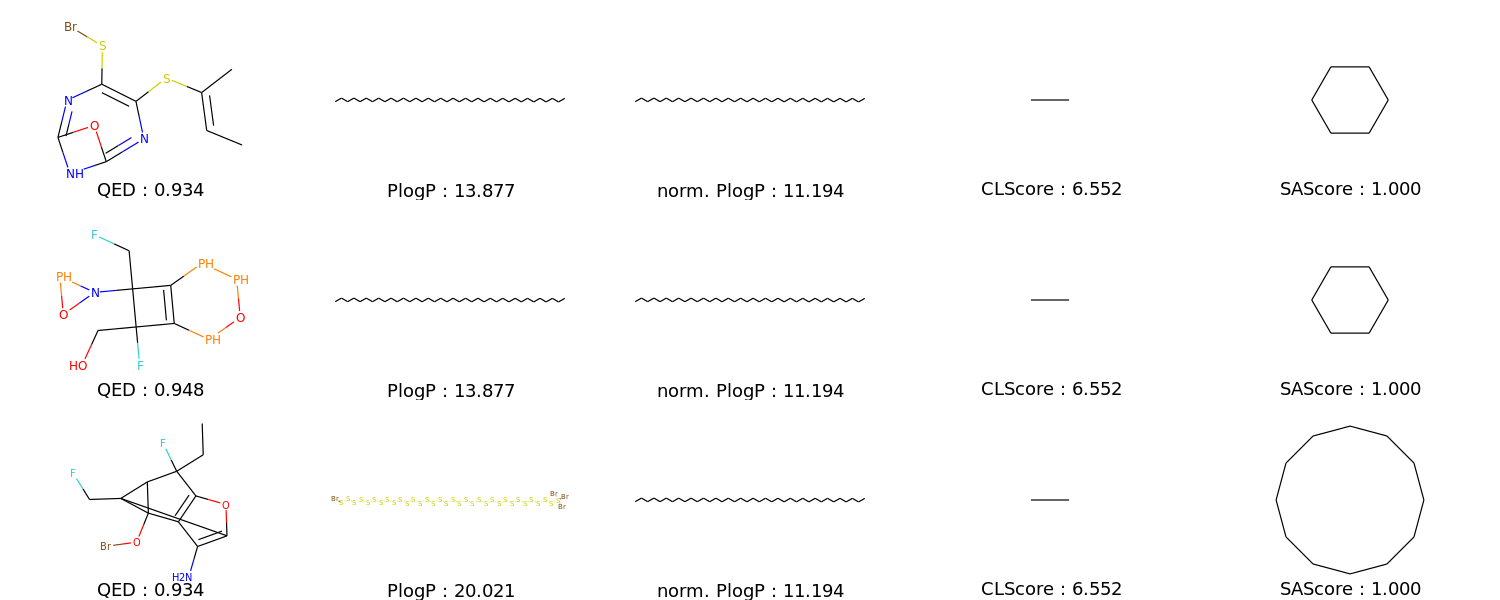

In [47]:
gen_figure(models_paths, names, size)

In [4]:
from chempopalg.molgraphops.molgraph import MolGraph
from rdkit.Chem import MolFromSmiles
from rdkit.Chem.Draw import MolToImage
from IPython.display import Image 

def draw(smi, size):
    display(MolToImage(MolFromSmiles(smi), size=size))